In [1]:
import os, json


path = "../data/cuts/"
cuts = [(vid+'/'+cut) for vid in os.listdir(path) for cut in os.listdir(path + vid) if cut.endswith("_signer.json")]

scores = []
for idx, cut in enumerate(cuts):
    with open(path + cut) as datafile:
        line = ""
        while ']' not in line:
            line += datafile.readline()
        line = line[:-2] + '}'
        signer_data = json.loads(line)
    scores.append(signer_data["scores"])

count    13975.000000
mean         2.567728
std          2.574434
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         29.000000
dtype: float64

<AxesSubplot:>

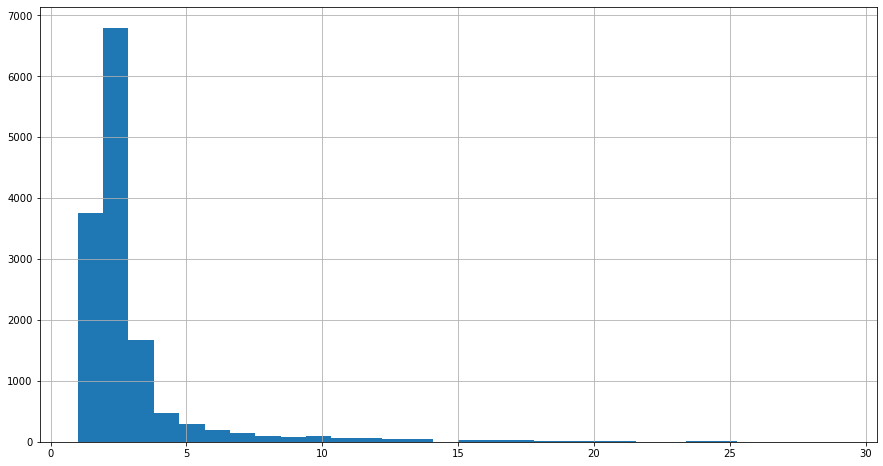

In [2]:
import pandas as pd

signers_s = pd.Series(map(len, scores))
display(signers_s.describe())
signers_s.hist(bins=30,figsize=(15,8))

count    10223.000000
mean         0.525002
std          0.299704
min          0.000003
25%          0.267998
50%          0.559218
75%          0.782344
max          1.000000
dtype: float64

<AxesSubplot:>

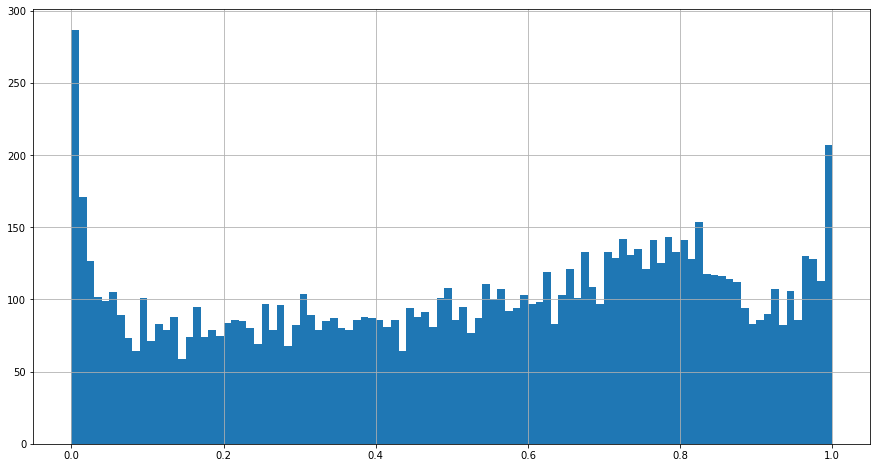

In [4]:
import pandas as pd
from IPython.display import display


def get_score(scores):
    m1 = max(scores)
    scores = [x for x in scores if x != m1]
    return (m1 - max(scores)) / m1

scores_s = pd.Series(map(get_score, filter(lambda s: len(s) >= 2, scores)))
display(scores_s.describe())
display(scores_s.hist(bins=100,figsize=(15,8)))

count    6798.000000
mean        0.576540
std         0.266203
min         0.000482
25%         0.374512
50%         0.621114
75%         0.789797
max         1.000000
dtype: float64

<AxesSubplot:>

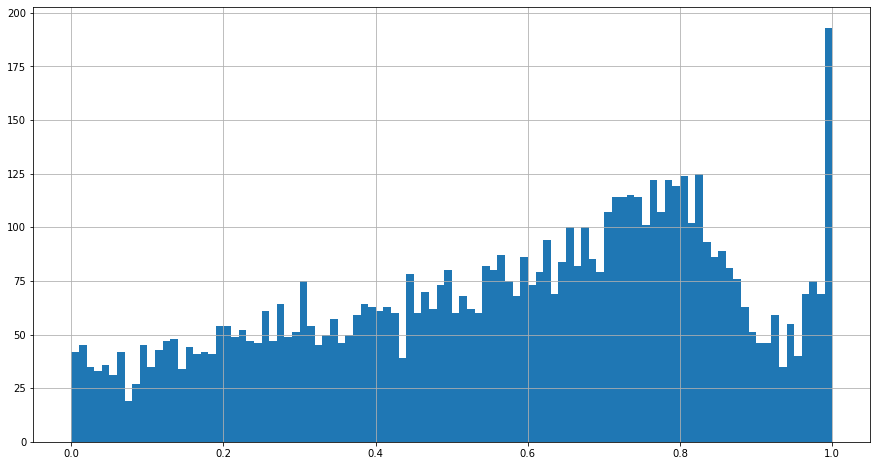

In [5]:
scores_2s_s = pd.Series(map(get_score, filter(lambda s: len(s) == 2, scores)))
display(scores_2s_s.describe())
display(scores_2s_s.hist(bins=100,figsize=(15,8)))

count    3425.000000
mean        0.422709
std         0.334281
min         0.000003
25%         0.098877
50%         0.357736
75%         0.733582
max         1.000000
dtype: float64

<AxesSubplot:>

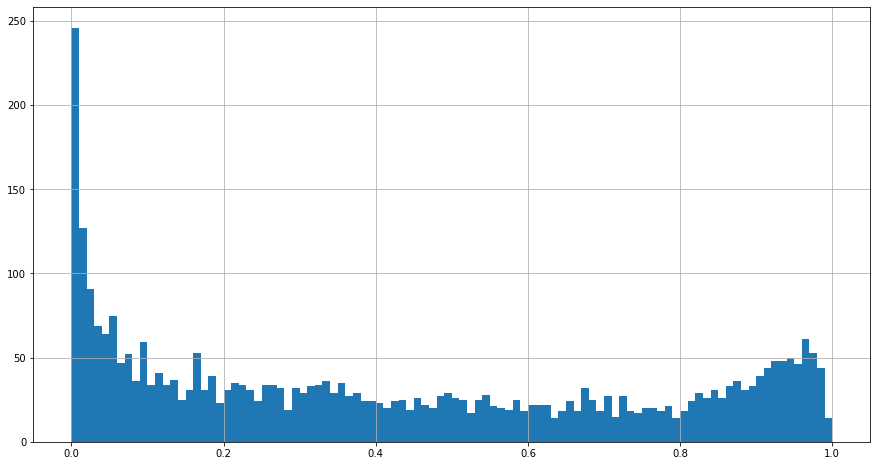

In [6]:
scores_ms_2 = pd.Series(map(get_score, filter(lambda s: len(s) > 2, scores)))
display(scores_ms_2.describe())
display(scores_ms_2.hist(bins=100,figsize=(15,8)))